## As we seen in the previous Jupyter file  we are getting average accuracy 95%. Now after applying Hyperparameter Tuning let's see the accuracy of the Model.

## Importing Labraries
The Labraries which we are needed for this Project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading & Reading the Dataset

In [2]:
data = pd.read_csv('../Sapalogy Project/bankruptcy.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Some information about the Dataset
Number of Rows in Dataset are 6819 & Number of Columns in Dataset are 96

In [3]:
print("Shape of Data:",data.shape)
r, c = data.shape
print("Number of Rows:",r)
print("Number of Columns:",c)

Shape of Data: (6819, 96)
Number of Rows: 6819
Number of Columns: 96


In [4]:
print("Names of Column:")
print(data.columns)

Names of Column:
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       '

In [5]:
print("Number of Null Values:",data.isnull().sum())

Number of Null Values: Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [6]:
print("Number of Duplicate Values: ",data.duplicated().sum())

Number of Duplicate Values:  0


In [7]:
print("Information about the Dataset")
data.info()

Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   f

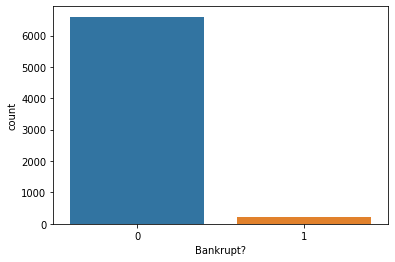

In [8]:
plt.figure()
sns.countplot(x = 'Bankrupt?',data = data )
plt.show()

In [9]:
print("Descriptive Stastices")
data.describe()

Descriptive Stastices


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Feature Selection
Feature engineering is an essential part of building any Machine Learning.
Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

In [10]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif

# to select the features
from sklearn.feature_selection import SelectKBest

In [11]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)

# X_train.shape, X_test.shape
print("Training Dataset Shape:",X_train.shape)
r, c = X_train.shape
print("Rows= ",r )
print("Columns= ",c)
print("Testing Dataset Shape:",X_test.shape)
r, c = X_test.shape
print("Rows= ",r )
print("Columns= ",c)

Training Dataset Shape: (4773, 95)
Rows=  4773
Columns=  95
Testing Dataset Shape: (2046, 95)
Rows=  2046
Columns=  95


### Determine Mutual Information

Calculate the mutual information between the variables and the target the smaller the value of the mi, the less information we can infer from the feature about the target.

In [12]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.02963597, 0.0339114 , 0.03006522, 0.01659994, 0.01673096,
       0.02013294, 0.0302592 , 0.02779624, 0.03155343, 0.03599249,
       0.        , 0.        , 0.0136699 , 0.        , 0.02132385,
       0.03066058, 0.0289152 , 0.02714035, 0.04380438, 0.00595561,
       0.00276246, 0.02366681, 0.04263151, 0.00920172, 0.006566  ,
       0.01226091, 0.00962644, 0.01124502, 0.01428975, 0.0005779 ,
       0.01178035, 0.        , 0.0247236 , 0.01848039, 0.03462357,
       0.03424671, 0.03434252, 0.035287  , 0.01058651, 0.03970474,
       0.00520439, 0.02420945, 0.04333231, 0.00464638, 0.00987247,
       0.00024059, 0.        , 0.        , 0.00253976, 0.        ,
       0.        , 0.02423005, 0.00737348, 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.02553516, 0.01534763, 0.01610328,
       0.01731491, 0.02269556, 0.        , 0.00257505, 0.02232087,
       0.02399633, 0.00350909, 0.03457833, 0.03417276, 0.00907948,
       0.        , 0.0033065 , 0.01903018, 0.00295956, 0.00380

Let's capture the above array in a pandas series add the variable names in the index sort the features based on their mutual information value and make a var plot

Text(0, 0.5, 'Mutual Information')

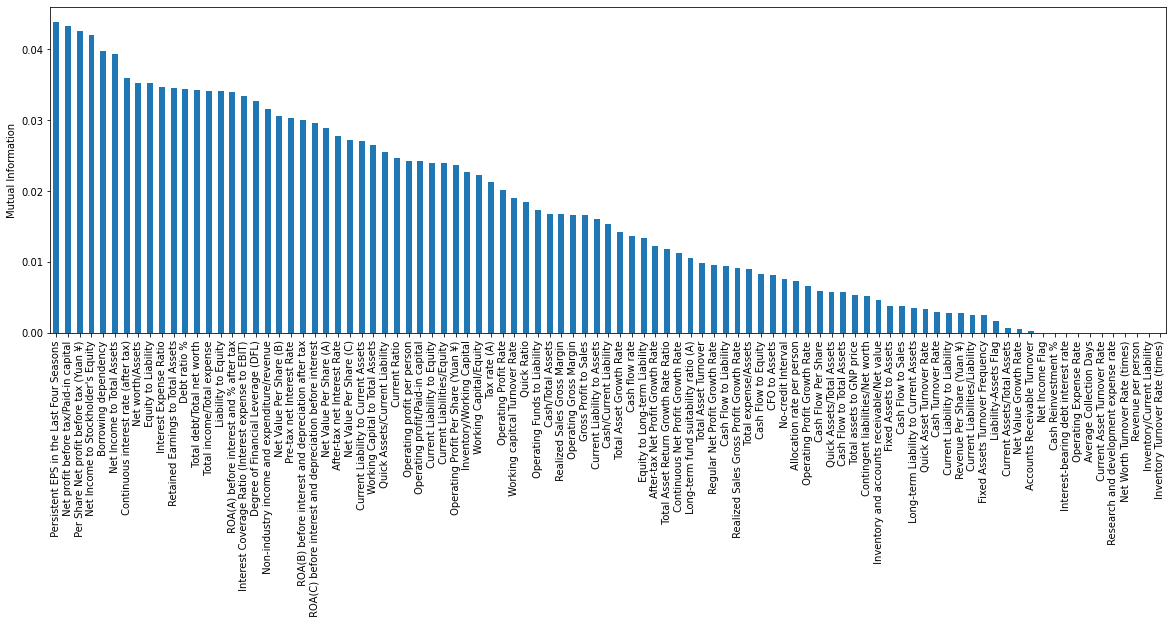

In [13]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero mutual information(mi) values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

Select top k features, where k is an arbitrary number of features

### Select top k features based on Mutual Information 
Here we will select the **top 10 features** based on their mutual information value

In [14]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

In [1]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

NameError: name 'sel_' is not defined

In [16]:
# X_train.shape,X_test.shape
r, c = X_train.shape
print("Train Dataset:")
print("Rows=",r)
print("Column=",c)
r, c = X_test.shape
print("Test Dataset:")
print("Rows=",r)
print("Column=",c)

Train Dataset:
Rows= 4773
Column= 10
Test Dataset:
Rows= 2046
Column= 10


Now our Training Dataset is of the size (4773,10) i.e. Rows = 4773, Columns = 10. And Testing Dataset is of the size (2046,10) i.e. Rows = 2046, Columns = 10.

# SMOTE


In [17]:
#Using SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 161
Before OverSampling, counts of label '0': 4612 



Here we can see the data is **Unbalance**. The lable which contain '0' is greater than the label containg '1'. 

So here we need to **Balance** the dataset in this way that our model get train in similar ways on both the labels. 

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [21]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (9224, 10)
After OverSampling, the shape of train_y: (9224,) 

After OverSampling, counts of label '1': 4612
After OverSampling, counts of label '0': 4612


Now, our dataset is been **Balance**, so we can train our privious model on this dataset.

In [22]:
#checking the length of the Training data before balancing
print(len(X_train))

4773


In [24]:
#checking the length of the Test data after balancing
print(len(X_train_res))

9224


In [25]:
from sklearn.linear_model import LogisticRegression
clas = LogisticRegression(random_state = 0)
clas.fit(X_train_res, y_train_res)

LogisticRegression(random_state=0)

In [26]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_res, y_train_res)

predictions = lr.predict(X_test)

#import classification report
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1987
           1       0.16      0.86      0.26        59

    accuracy                           0.86      2046
   macro avg       0.58      0.86      0.59      2046
weighted avg       0.97      0.86      0.90      2046



In [29]:
y_pred = clas.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_org = accuracy_score(y_test, y_pred)

[[1711  276]
 [   8   51]]


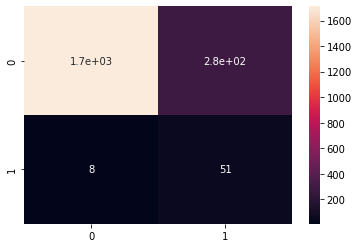

accuracy= 0.8611925708699902


In [30]:
sns.heatmap(cm,annot=True)
plt.show()
print("accuracy=", acc_org )

Here, you can the accuracy after **balancing** the data is **86.11%**

# Applying Hyperparameter Tuning

### 1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = LR_classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [48]:
from sklearn.metrics import accuracy_score
LR_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Logistic Regression Model: {acc1}")

Accuracy score for Logistic Regression Model: 0.9721407624633431


### Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = LR_classifier, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.21 %
Standard Deviation: 1.14 %


### Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ['l1','l2'], 'C': np.arange(1,10) }]

grid_search = GridSearchCV(estimator = LR_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [53]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\Atish\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Atish\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Atish\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Atish\AppData\Local\Programs\Python

In [54]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.72 %
Best Parameters: {'C': 8, 'penalty': 'l2'}


###  2. Decision Tree

### Fitting Decision Tree Regression model on training dataset

In [58]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

In [59]:
#fitting decision tree on data

regressor1 = regressor.fit(X_train_res,y_train_res)

### Make predictions on test dataset

In [62]:
# make predictions on the testing set
y_pred = regressor1.predict(X_test)

In [63]:
# import module to be used for model evaluation

from sklearn import metrics

In [64]:
# Mean Squared Error
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))

Mean square error (MSE): 0.08406647116324535


In [65]:
# Root Mean Squared Error
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean square error (RMSE): 0.28994218589788784


In [66]:
#cross-checking

df_check = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10].ravel()})
df_check

,Actual,Predicted
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [67]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(regressor,filled=True,rounded=True)
graph = graph_from_dot_data(dot_data)
graph.write_png('regression_tree.png')

True

In [68]:
y_pred = regressor1.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree: {acc5}")

Accuracy score for Decision Tree: 0.9159335288367546


### cross validatiom


In [70]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = regressor1, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -65.93 %
Standard Deviation: 79.84 %


### grid search

In [3]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

NameError: name 'classifier1' is not defined

In [2]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

NameError: name 'grid_search' is not defined

In [1]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

NameError: name 'best_accuracy' is not defined

### 3. SVM

In [71]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier3 = classifier2.fit(X_train_res, y_train_res)

In [73]:
y_pred = classifier3.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1678  309]
 [   6   53]]


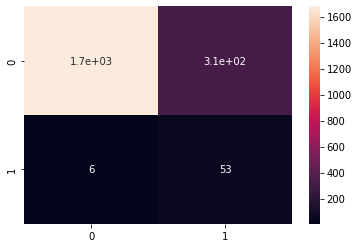

In [74]:
sns.heatmap(cm,annot=True)
plt.show()

In [1]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for SVM: {acc2}")

NameError: name 'accuracy_score' is not defined

### Cross Validation


In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier3, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = classifier3,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy of SVM: {:.2f} %".format(best_accuracy*100))
print("Best Parameters of SVM:", best_parameters)

### 3. K-NN

### Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_res, y_train_res)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

### KNN Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for K-NN: {acc3}")

### Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier2, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy of SVM: {:.2f} %".format(best_accuracy*100))
print("Best Parameters of SVM:", best_parameters)

### 4. Naive Bayes

### Training the Naive Bayes on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_res, y_train_res)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Naive Bayes: {acc4}")

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier2, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy of SVM: {:.2f} %".format(best_accuracy*100))
print("Best Parameters of SVM:", best_parameters)

### 5. Decision Tree

### Training Decision Tree Classification on Train set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_res, y_train_res)

In [ ]:
y_pred = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree: {acc5}")

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier2, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy of SVM: {:.2f} %".format(best_accuracy*100))
print("Best Parameters of SVM:", best_parameters)

### 6. Random Forest

### Training the Random Forest Classification model on the Training set

In [4]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_res, y_train_res)

NameError: name 'X_train_res' is not defined

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Random Forest Classification accuracy: {acc6}")

### CrossValidation


In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier2, X = X_train_res, y = y_train_res, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

###  Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy of SVM: {:.2f} %".format(best_accuracy*100))
print("Best Parameters of SVM:", best_parameters)